In [1]:
from point_finders import *

getting loaders
Files already downloaded and verified
You are going to run models on the test set. Are you sure?
Files already downloaded and verified
getting data


In [2]:
import models
model_name = 'Linear5NoBias'
architecture = getattr(models, model_name) #LinearOneLayer LogRegression

In [3]:
model1 = architecture.base(num_classes=10, **architecture.kwargs)
model2 = architecture.base(num_classes=10, **architecture.kwargs)
model1.load_state_dict(torch.load('curves/'+model_name+'/curve3/checkpoint-400.pt')['model_state'])
model2.load_state_dict(torch.load('curves/'+model_name+'/curve4/checkpoint-400.pt')['model_state'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [4]:
depth = 5

In [5]:
# N_data = 10 #6144
# data, targ = data[:N_data], targ[:N_data]

# End Point Stat

In [ ]:
stat = get_end_point_stat(architecture, model_name, beg_ind=1, end_ind=8)

 14%|█▍        | 1/7 [00:18<01:51, 18.63s/it]

train results {'nll': 0.025799275891780854, 'loss': 0.025799275891780854, 'accuracy': 99.366}
test results {'nll': 2.340163063430786, 'loss': 2.340163063430786, 'accuracy': 61.71}


 29%|██▊       | 2/7 [00:36<01:32, 18.54s/it]

train results {'nll': 0.022805038956403734, 'loss': 0.022805038956403734, 'accuracy': 99.446}
test results {'nll': 2.369862328720093, 'loss': 2.369862328720093, 'accuracy': 61.49}


 43%|████▎     | 3/7 [00:56<01:15, 18.77s/it]

train results {'nll': 0.02311081454396248, 'loss': 0.02311081454396248, 'accuracy': 99.476}
test results {'nll': 2.3554563179016115, 'loss': 2.3554563179016115, 'accuracy': 61.85}


 57%|█████▋    | 4/7 [01:14<00:56, 18.70s/it]

train results {'nll': 0.024681506884694098, 'loss': 0.024681506884694098, 'accuracy': 99.342}
test results {'nll': 2.369380573654175, 'loss': 2.369380573654175, 'accuracy': 61.53}


In [12]:
get_mean_svd(stat)

(99.42228571428572,
 0.05293045109444276,
 61.72428571428571,
 0.21029619539097197)

# Simultaneous Connection Stat

In [ ]:
pf = PointFinderSimultaneous(model1, model2, architecture)

In [ ]:
pf.find_point(0.5)

In [ ]:
stat_s = get_stat(PointFinderSimultaneous, model_name, architecture, t=0.5,
                  beg_ind=1, end_ind=7)
get_mean_svd(stat_s)

In [14]:
get_mean_svd(stat_s)

(43.066, 1.9372585440943753, 37.92333333333333, 1.8489786970709587)

In [16]:
stat_sl = get_stat(PointFinderSimultaneous, model_name, architecture, 
                  beg_ind=1, end_ind=7, method='lin_connect')
get_mean_svd(stat_sl)


 17%|█▋        | 1/6 [00:20<01:41, 20.23s/it]

train results {'nll': 2.1606676138305665, 'loss': 2.1606676138305665, 'accuracy': 38.052}
test results {'nll': 2.1791792755126953, 'loss': 2.1791792755126953, 'accuracy': 33.61}



 33%|███▎      | 2/6 [00:40<01:21, 20.30s/it]

train results {'nll': 2.1705334020233154, 'loss': 2.1705334020233154, 'accuracy': 30.958}
test results {'nll': 2.1869637825012207, 'loss': 2.1869637825012207, 'accuracy': 26.98}



 50%|█████     | 3/6 [01:00<01:00, 20.26s/it]

train results {'nll': 2.156970229110718, 'loss': 2.156970229110718, 'accuracy': 33.708}
test results {'nll': 2.174539278793335, 'loss': 2.174539278793335, 'accuracy': 29.42}



 67%|██████▋   | 4/6 [01:22<00:41, 20.71s/it]

train results {'nll': 2.158530164489746, 'loss': 2.158530164489746, 'accuracy': 36.93}
test results {'nll': 2.174554136657715, 'loss': 2.174554136657715, 'accuracy': 32.79}



 83%|████████▎ | 5/6 [01:43<00:20, 20.71s/it]

train results {'nll': 2.141670345001221, 'loss': 2.141670345001221, 'accuracy': 36.414}
test results {'nll': 2.1602546333312986, 'loss': 2.1602546333312986, 'accuracy': 31.41}



100%|██████████| 6/6 [02:04<00:00, 20.70s/it]


train results {'nll': 2.146985368270874, 'loss': 2.146985368270874, 'accuracy': 33.994}
test results {'nll': 2.163372517776489, 'loss': 2.163372517776489, 'accuracy': 30.0}


(35.00933333333334, 2.3824896408775613, 30.701666666666668, 2.210093638036381)

In [17]:
get_mean_svd(stat_sl)

(35.00933333333334, 2.3824896408775613, 30.701666666666668, 2.210093638036381)

# Butterfly Stat

In [6]:
pf_b = PointFinderStepWiseButterfly(model1, model2, architecture)

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps


  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps


100%|██████████| 3/3 [00:21<00:00,  8.48s/it]
0it [00:00, ?it/s]

adjusting weights


3it [07:43, 212.26s/it]


In [13]:
time = np.linspace(0, depth-1, depth*6+1)
time

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
       1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
       2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
       3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
       4.16666667, 4.33333333, 4.5       , 4.66666667, 4.83333333,
       5.        ])

In [14]:
path_b = find_path(time, pf_b, method='arc_connect')

  3%|▎         | 1/31 [00:20<10:08, 20.27s/it]

train results {'nll': 0.02311081440448761, 'loss': 0.02311081440448761, 'accuracy': 99.476}
test results {'nll': 2.3554563610076906, 'loss': 2.3554563610076906, 'accuracy': 61.85}


  6%|▋         | 2/31 [00:42<10:02, 20.77s/it]

train results {'nll': 0.0346201055085659, 'loss': 0.0346201055085659, 'accuracy': 99.118}
test results {'nll': 2.355057799911499, 'loss': 2.355057799911499, 'accuracy': 61.15}


 10%|▉         | 3/31 [01:01<09:33, 20.48s/it]

train results {'nll': 0.09705775912284852, 'loss': 0.09705775912284852, 'accuracy': 96.842}
test results {'nll': 2.429749712753296, 'loss': 2.429749712753296, 'accuracy': 59.21}


 13%|█▎        | 4/31 [01:22<09:16, 20.63s/it]

train results {'nll': 0.1613047597026825, 'loss': 0.1613047597026825, 'accuracy': 94.53}
test results {'nll': 2.4986160202026366, 'loss': 2.4986160202026366, 'accuracy': 58.18}


 16%|█▌        | 5/31 [01:44<09:02, 20.85s/it]

train results {'nll': 0.10556922871351242, 'loss': 0.10556922871351242, 'accuracy': 96.418}
test results {'nll': 2.446371557998657, 'loss': 2.446371557998657, 'accuracy': 59.37}


 19%|█▉        | 6/31 [02:04<08:36, 20.66s/it]

train results {'nll': 0.03920828018784523, 'loss': 0.03920828018784523, 'accuracy': 98.926}
test results {'nll': 2.371749269104004, 'loss': 2.371749269104004, 'accuracy': 61.09}


 23%|██▎       | 7/31 [02:26<08:21, 20.90s/it]

train results {'nll': 0.025912263960838317, 'loss': 0.025912263960838317, 'accuracy': 99.386}
test results {'nll': 2.3626223724365234, 'loss': 2.3626223724365234, 'accuracy': 61.72}


 26%|██▌       | 8/31 [02:46<07:58, 20.79s/it]

train results {'nll': 0.08407561532020569, 'loss': 0.08407561532020569, 'accuracy': 97.18}
test results {'nll': 2.4180985580444334, 'loss': 2.4180985580444334, 'accuracy': 60.59}


 29%|██▉       | 9/31 [03:06<07:29, 20.42s/it]

train results {'nll': 0.5000852962112426, 'loss': 0.5000852962112426, 'accuracy': 84.768}
test results {'nll': 2.6560116397857665, 'loss': 2.6560116397857665, 'accuracy': 57.26}


 32%|███▏      | 10/31 [03:25<07:03, 20.16s/it]

train results {'nll': 0.9723580808067321, 'loss': 0.9723580808067321, 'accuracy': 75.454}
test results {'nll': 2.8543504409790037, 'loss': 2.8543504409790037, 'accuracy': 55.34}


 35%|███▌      | 11/31 [03:45<06:38, 19.94s/it]

train results {'nll': 0.7549392844581604, 'loss': 0.7549392844581604, 'accuracy': 79.118}
test results {'nll': 2.667583271789551, 'loss': 2.667583271789551, 'accuracy': 56.84}


 39%|███▊      | 12/31 [04:04<06:16, 19.84s/it]

train results {'nll': 0.284160764093399, 'loss': 0.284160764093399, 'accuracy': 90.196}
test results {'nll': 2.381463835144043, 'loss': 2.381463835144043, 'accuracy': 59.93}


 42%|████▏     | 13/31 [04:24<05:56, 19.83s/it]

train results {'nll': 0.14499025668621063, 'loss': 0.14499025668621063, 'accuracy': 94.862}
test results {'nll': 2.271600431442261, 'loss': 2.271600431442261, 'accuracy': 61.66}


 45%|████▌     | 14/31 [04:44<05:36, 19.81s/it]

train results {'nll': 0.3119721153640747, 'loss': 0.3119721153640747, 'accuracy': 89.516}
test results {'nll': 2.407923331451416, 'loss': 2.407923331451416, 'accuracy': 60.18}


 48%|████▊     | 15/31 [05:02<05:10, 19.43s/it]

train results {'nll': 0.8591339293289184, 'loss': 0.8591339293289184, 'accuracy': 77.45}
test results {'nll': 2.633820461654663, 'loss': 2.633820461654663, 'accuracy': 57.1}


 52%|█████▏    | 16/31 [05:22<04:53, 19.56s/it]

train results {'nll': 1.2360605472564696, 'loss': 1.2360605472564696, 'accuracy': 71.57}
test results {'nll': 2.753880615234375, 'loss': 2.753880615234375, 'accuracy': 55.32}


 55%|█████▍    | 17/31 [05:42<04:36, 19.77s/it]

train results {'nll': 0.9473435217666626, 'loss': 0.9473435217666626, 'accuracy': 75.926}
test results {'nll': 2.5618952545166014, 'loss': 2.5618952545166014, 'accuracy': 57.54}


 58%|█████▊    | 18/31 [06:03<04:19, 19.96s/it]

train results {'nll': 0.418967825422287, 'loss': 0.418967825422287, 'accuracy': 86.528}
test results {'nll': 2.2669828937530516, 'loss': 2.2669828937530516, 'accuracy': 61.07}


 61%|██████▏   | 19/31 [06:23<04:01, 20.13s/it]

train results {'nll': 0.2234483252429962, 'loss': 0.2234483252429962, 'accuracy': 91.974}
test results {'nll': 2.1622446655273437, 'loss': 2.1622446655273437, 'accuracy': 62.52}


 65%|██████▍   | 20/31 [06:44<03:44, 20.42s/it]

train results {'nll': 0.22603630239963532, 'loss': 0.22603630239963532, 'accuracy': 91.996}
test results {'nll': 2.1740310009002686, 'loss': 2.1740310009002686, 'accuracy': 62.24}


 68%|██████▊   | 21/31 [07:05<03:24, 20.47s/it]

train results {'nll': 0.19430615143299101, 'loss': 0.19430615143299101, 'accuracy': 93.134}
test results {'nll': 2.19307737159729, 'loss': 2.19307737159729, 'accuracy': 62.02}


 71%|███████   | 22/31 [07:24<03:00, 20.05s/it]

train results {'nll': 0.12041250507593156, 'loss': 0.12041250507593156, 'accuracy': 95.864}
test results {'nll': 2.228422426986694, 'loss': 2.228422426986694, 'accuracy': 61.64}


 74%|███████▍  | 23/31 [07:45<02:41, 20.20s/it]

train results {'nll': 0.05622499491453171, 'loss': 0.05622499491453171, 'accuracy': 98.328}
test results {'nll': 2.280330142211914, 'loss': 2.280330142211914, 'accuracy': 61.71}


 77%|███████▋  | 24/31 [08:04<02:20, 20.01s/it]

train results {'nll': 0.029780661680698393, 'loss': 0.029780661680698393, 'accuracy': 99.254}
test results {'nll': 2.338973477554321, 'loss': 2.338973477554321, 'accuracy': 61.46}


 81%|████████  | 25/31 [08:24<01:59, 19.97s/it]

train results {'nll': 0.02468150682747364, 'loss': 0.02468150682747364, 'accuracy': 99.342}
test results {'nll': 2.369380598068237, 'loss': 2.369380598068237, 'accuracy': 61.53}


 84%|████████▍ | 26/31 [08:43<01:38, 19.74s/it]

train results {'nll': 0.02468150682747364, 'loss': 0.02468150682747364, 'accuracy': 99.342}
test results {'nll': 2.369380598068237, 'loss': 2.369380598068237, 'accuracy': 61.53}


 87%|████████▋ | 27/31 [09:04<01:20, 20.17s/it]

train results {'nll': 0.02468150682747364, 'loss': 0.02468150682747364, 'accuracy': 99.342}
test results {'nll': 2.369380598068237, 'loss': 2.369380598068237, 'accuracy': 61.53}


 90%|█████████ | 28/31 [09:23<00:59, 19.81s/it]

train results {'nll': 0.02468150682747364, 'loss': 0.02468150682747364, 'accuracy': 99.342}
test results {'nll': 2.369380598068237, 'loss': 2.369380598068237, 'accuracy': 61.53}


 94%|█████████▎| 29/31 [09:43<00:39, 19.65s/it]

train results {'nll': 0.02468150682747364, 'loss': 0.02468150682747364, 'accuracy': 99.342}
test results {'nll': 2.369380598068237, 'loss': 2.369380598068237, 'accuracy': 61.53}


 97%|█████████▋| 30/31 [10:02<00:19, 19.49s/it]

train results {'nll': 0.02468150682747364, 'loss': 0.02468150682747364, 'accuracy': 99.342}
test results {'nll': 2.369380598068237, 'loss': 2.369380598068237, 'accuracy': 61.53}


100%|██████████| 31/31 [10:22<00:00, 19.78s/it]

train results {'nll': 0.02468150682747364, 'loss': 0.02468150682747364, 'accuracy': 99.342}
test results {'nll': 2.369380598068237, 'loss': 2.369380598068237, 'accuracy': 61.53}


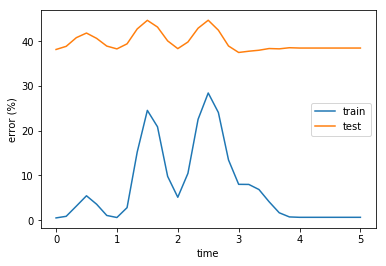

In [24]:
plt.plot(time, path_b['train'], label='train')
plt.plot(time, path_b['test'], label='test') 
plt.legend()
plt.xlabel('time')
plt.ylabel('error (%)')
plt.show()

In [20]:
path_bl = find_path(time, pf_b, method='lin_connect')

  3%|▎         | 1/31 [00:21<10:40, 21.34s/it]

train results {'nll': 0.02311081454396248, 'loss': 0.02311081454396248, 'accuracy': 99.476}
test results {'nll': 2.3554563179016115, 'loss': 2.3554563179016115, 'accuracy': 61.85}


  6%|▋         | 2/31 [00:41<10:12, 21.12s/it]

train results {'nll': 0.08720788746356964, 'loss': 0.08720788746356964, 'accuracy': 97.932}
test results {'nll': 1.7780547721862794, 'loss': 1.7780547721862794, 'accuracy': 60.17}


 10%|▉         | 3/31 [01:01<09:41, 20.78s/it]

train results {'nll': 0.47396703837394716, 'loss': 0.47396703837394716, 'accuracy': 86.786}
test results {'nll': 1.7232871501922606, 'loss': 1.7232871501922606, 'accuracy': 55.09}


 13%|█▎        | 4/31 [01:22<09:20, 20.76s/it]

train results {'nll': 0.7984614414787292, 'loss': 0.7984614414787292, 'accuracy': 77.21}
test results {'nll': 1.8306959436416625, 'loss': 1.8306959436416625, 'accuracy': 51.4}


 16%|█▌        | 5/31 [01:44<09:05, 20.99s/it]

train results {'nll': 0.48141415026664736, 'loss': 0.48141415026664736, 'accuracy': 86.492}
test results {'nll': 1.7275740980148315, 'loss': 1.7275740980148315, 'accuracy': 54.69}


 19%|█▉        | 6/31 [02:05<08:43, 20.96s/it]

train results {'nll': 0.09192053787946701, 'loss': 0.09192053787946701, 'accuracy': 97.808}
test results {'nll': 1.7828379999160766, 'loss': 1.7828379999160766, 'accuracy': 60.31}


 23%|██▎       | 7/31 [02:24<08:13, 20.56s/it]

train results {'nll': 0.025912264075279235, 'loss': 0.025912264075279235, 'accuracy': 99.386}
test results {'nll': 2.3626224700927736, 'loss': 2.3626224700927736, 'accuracy': 61.72}


 26%|██▌       | 8/31 [02:43<07:41, 20.08s/it]

train results {'nll': 0.09333312831640243, 'loss': 0.09333312831640243, 'accuracy': 98.506}
test results {'nll': 1.6140877210617066, 'loss': 1.6140877210617066, 'accuracy': 59.95}


 29%|██▉       | 9/31 [03:04<07:28, 20.38s/it]

train results {'nll': 0.4667613110351562, 'loss': 0.4667613110351562, 'accuracy': 87.35}
test results {'nll': 1.4024397975921632, 'loss': 1.4024397975921632, 'accuracy': 55.47}


 32%|███▏      | 10/31 [03:24<07:05, 20.26s/it]

train results {'nll': 0.8191418940544128, 'loss': 0.8191418940544128, 'accuracy': 73.788}
test results {'nll': 1.4196714124679566, 'loss': 1.4196714124679566, 'accuracy': 52.47}


 35%|███▌      | 11/31 [03:45<06:48, 20.41s/it]

train results {'nll': 0.6005461861991882, 'loss': 0.6005461861991882, 'accuracy': 81.124}
test results {'nll': 1.3618516471862794, 'loss': 1.3618516471862794, 'accuracy': 55.4}


 39%|███▊      | 12/31 [04:05<06:23, 20.16s/it]

train results {'nll': 0.24617093779087065, 'loss': 0.24617093779087065, 'accuracy': 92.582}
test results {'nll': 1.5472911788940429, 'loss': 1.5472911788940429, 'accuracy': 59.44}


 42%|████▏     | 13/31 [04:24<05:58, 19.90s/it]

train results {'nll': 0.14499025496006013, 'loss': 0.14499025496006013, 'accuracy': 94.862}
test results {'nll': 2.271600407028198, 'loss': 2.271600407028198, 'accuracy': 61.66}


 45%|████▌     | 14/31 [04:45<05:46, 20.38s/it]

train results {'nll': 0.253011050362587, 'loss': 0.253011050362587, 'accuracy': 91.91}
test results {'nll': 1.6133199705123902, 'loss': 1.6133199705123902, 'accuracy': 59.93}


 48%|████▊     | 15/31 [05:06<05:28, 20.52s/it]

train results {'nll': 0.6327627783775329, 'loss': 0.6327627783775329, 'accuracy': 78.652}
test results {'nll': 1.426716219329834, 'loss': 1.426716219329834, 'accuracy': 54.79}


 52%|█████▏    | 16/31 [05:26<05:04, 20.30s/it]

train results {'nll': 0.8978817501640319, 'loss': 0.8978817501640319, 'accuracy': 68.92}
test results {'nll': 1.4335811235427856, 'loss': 1.4335811235427856, 'accuracy': 52.17}


 55%|█████▍    | 17/31 [05:47<04:46, 20.45s/it]

train results {'nll': 0.6589951518630981, 'loss': 0.6589951518630981, 'accuracy': 77.226}
test results {'nll': 1.379001441192627, 'loss': 1.379001441192627, 'accuracy': 56.32}


 58%|█████▊    | 18/31 [06:06<04:22, 20.20s/it]

train results {'nll': 0.30841596450805664, 'loss': 0.30841596450805664, 'accuracy': 89.352}
test results {'nll': 1.5194392221450805, 'loss': 1.5194392221450805, 'accuracy': 60.93}


 61%|██████▏   | 19/31 [06:26<04:00, 20.03s/it]

train results {'nll': 0.22344832560062408, 'loss': 0.22344832560062408, 'accuracy': 91.974}
test results {'nll': 2.162244689941406, 'loss': 2.162244689941406, 'accuracy': 62.52}


 65%|██████▍   | 20/31 [06:46<03:39, 19.92s/it]

train results {'nll': 0.22609749842643737, 'loss': 0.22609749842643737, 'accuracy': 92.012}
test results {'nll': 1.6470663568496704, 'loss': 1.6470663568496704, 'accuracy': 62.05}


 68%|██████▊   | 21/31 [07:10<03:32, 21.25s/it]

train results {'nll': 0.24449357938289643, 'loss': 0.24449357938289643, 'accuracy': 92.612}
test results {'nll': 1.3868600011825563, 'loss': 1.3868600011825563, 'accuracy': 61.94}


 71%|███████   | 22/31 [07:33<03:16, 21.87s/it]

train results {'nll': 0.20222292092323305, 'loss': 0.20222292092323305, 'accuracy': 95.54}
test results {'nll': 1.3328173973083497, 'loss': 1.3328173973083497, 'accuracy': 61.44}


 74%|███████▍  | 23/31 [07:53<02:49, 21.17s/it]

train results {'nll': 0.10385996617555618, 'loss': 0.10385996617555618, 'accuracy': 98.554}
test results {'nll': 1.4487355833053588, 'loss': 1.4487355833053588, 'accuracy': 61.31}


 77%|███████▋  | 24/31 [08:13<02:26, 20.94s/it]

train results {'nll': 0.04303991104364395, 'loss': 0.04303991104364395, 'accuracy': 99.296}
test results {'nll': 1.780536612701416, 'loss': 1.780536612701416, 'accuracy': 61.34}


 81%|████████  | 25/31 [08:34<02:06, 21.01s/it]

train results {'nll': 0.024681506884694098, 'loss': 0.024681506884694098, 'accuracy': 99.342}
test results {'nll': 2.369380573654175, 'loss': 2.369380573654175, 'accuracy': 61.53}


 84%|████████▍ | 26/31 [08:54<01:43, 20.67s/it]

train results {'nll': 0.024681506884694098, 'loss': 0.024681506884694098, 'accuracy': 99.342}
test results {'nll': 2.369380573654175, 'loss': 2.369380573654175, 'accuracy': 61.53}


 87%|████████▋ | 27/31 [09:15<01:22, 20.52s/it]

train results {'nll': 0.024681506884694098, 'loss': 0.024681506884694098, 'accuracy': 99.342}
test results {'nll': 2.369380573654175, 'loss': 2.369380573654175, 'accuracy': 61.53}


 90%|█████████ | 28/31 [09:35<01:01, 20.52s/it]

train results {'nll': 0.024681506884694098, 'loss': 0.024681506884694098, 'accuracy': 99.342}
test results {'nll': 2.369380573654175, 'loss': 2.369380573654175, 'accuracy': 61.53}


 94%|█████████▎| 29/31 [10:00<00:43, 21.88s/it]

train results {'nll': 0.024681506884694098, 'loss': 0.024681506884694098, 'accuracy': 99.342}
test results {'nll': 2.369380573654175, 'loss': 2.369380573654175, 'accuracy': 61.53}


 97%|█████████▋| 30/31 [10:24<00:22, 22.61s/it]

train results {'nll': 0.024681506884694098, 'loss': 0.024681506884694098, 'accuracy': 99.342}
test results {'nll': 2.369380573654175, 'loss': 2.369380573654175, 'accuracy': 61.53}


100%|██████████| 31/31 [10:45<00:00, 22.06s/it]

train results {'nll': 0.024681506884694098, 'loss': 0.024681506884694098, 'accuracy': 99.342}
test results {'nll': 2.369380573654175, 'loss': 2.369380573654175, 'accuracy': 61.53}


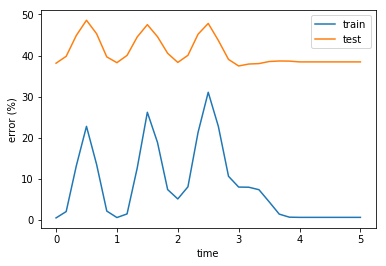

In [23]:
plt.plot(time, path_bl['train'], label='train')
plt.plot(time, path_bl['test'], label='test') 
plt.legend()
plt.xlabel('time')
plt.ylabel('error (%)')
plt.show()

In [16]:
stat_b = get_stat(PointFinderStepWiseButterfly, model_name, architecture, t=2.5,
                  beg_ind=1, end_ind=7)

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  7.97s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:23<00:00,  9.11s/it]

0it [00:00, ?it/s]

adjusting weights



1it [10:02, 602.75s/it]
2it [10:44, 434.39s/it]
3it [10:58, 308.19s/it]
 17%|█▋        | 1/6 [12:02<1:00:10, 722.16s/it]

train results {'nll': 1.215883578414917, 'loss': 1.215883578414917, 'accuracy': 71.45}
test results {'nll': 2.7456366962432863, 'loss': 2.7456366962432863, 'accuracy': 55.17}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  8.17s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  7.82s/it]

0it [00:00, ?it/s]

adjusting weights



1it [06:55, 415.97s/it]
2it [07:40, 304.62s/it]
3it [07:57, 218.31s/it]
 33%|███▎      | 2/6 [21:02<44:30, 667.59s/it]  

train results {'nll': 1.2504998838424684, 'loss': 1.2504998838424684, 'accuracy': 70.806}
test results {'nll': 2.7852711139678954, 'loss': 2.7852711139678954, 'accuracy': 55.1}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  8.15s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  8.08s/it]

0it [00:00, ?it/s]

adjusting weights



1it [06:52, 412.92s/it]
2it [07:39, 303.05s/it]
3it [07:51, 215.70s/it]
 50%|█████     | 3/6 [29:57<31:23, 627.84s/it]

train results {'nll': 1.2360605472564696, 'loss': 1.2360605472564696, 'accuracy': 71.57}
test results {'nll': 2.753880615234375, 'loss': 2.753880615234375, 'accuracy': 55.32}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:21<00:00,  8.30s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  7.89s/it]

0it [00:00, ?it/s]

adjusting weights



1it [06:43, 403.24s/it]
2it [07:24, 294.60s/it]
3it [07:39, 210.74s/it]
 67%|██████▋   | 4/6 [38:39<19:52, 596.09s/it]

train results {'nll': 1.3182989444351196, 'loss': 1.3182989444351196, 'accuracy': 70.342}
test results {'nll': 2.8603381500244143, 'loss': 2.8603381500244143, 'accuracy': 55.42}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:21<00:00,  8.63s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  8.05s/it]

0it [00:00, ?it/s]

adjusting weights



1it [06:55, 415.87s/it]
2it [07:37, 303.51s/it]
3it [07:54, 217.50s/it]
 83%|████████▎ | 5/6 [47:37<09:38, 578.58s/it]

train results {'nll': 1.2177199729919435, 'loss': 1.2177199729919435, 'accuracy': 71.726}
test results {'nll': 2.72945258140564, 'loss': 2.72945258140564, 'accuracy': 55.96}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  7.90s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:21<00:00,  8.51s/it]

0it [00:00, ?it/s]

adjusting weights



1it [06:47, 407.83s/it]
2it [07:34, 299.46s/it]
3it [07:50, 214.34s/it]
100%|██████████| 6/6 [56:31<00:00, 565.27s/it]

train results {'nll': 1.2250014945602417, 'loss': 1.2250014945602417, 'accuracy': 71.65}
test results {'nll': 2.7204241199493406, 'loss': 2.7204241199493406, 'accuracy': 55.79}


In [17]:
get_mean_svd(stat_b)

(71.25733333333334, 0.5083065566718143, 55.46, 0.3145896798476809)

In [18]:
stat_bl = get_stat(PointFinderStepWiseButterfly, model_name, architecture, t=2.5,
                  beg_ind=1, end_ind=7, method='lin_connect')

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:21<00:00,  8.18s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:22<00:00,  8.69s/it]

0it [00:00, ?it/s]

adjusting weights



1it [06:44, 404.08s/it]
2it [07:25, 295.16s/it]
3it [07:39, 210.84s/it]
 17%|█▋        | 1/6 [08:43<43:39, 523.85s/it]

train results {'nll': 0.8882643632507324, 'loss': 0.8882643632507324, 'accuracy': 69.284}
test results {'nll': 1.4316685306549073, 'loss': 1.4316685306549073, 'accuracy': 52.9}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  7.95s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  8.11s/it]

0it [00:00, ?it/s]

adjusting weights



1it [06:52, 412.36s/it]
2it [07:32, 300.66s/it]
3it [07:45, 214.49s/it]
 33%|███▎      | 2/6 [17:30<34:58, 524.56s/it]

train results {'nll': 0.9013060256576538, 'loss': 0.9013060256576538, 'accuracy': 68.67}
test results {'nll': 1.4519644258499145, 'loss': 1.4519644258499145, 'accuracy': 52.0}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  7.81s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  7.79s/it]

0it [00:00, ?it/s]

adjusting weights



1it [06:55, 415.22s/it]
2it [07:38, 303.68s/it]
3it [08:03, 219.94s/it]
 50%|█████     | 3/6 [26:35<26:32, 530.86s/it]

train results {'nll': 0.8978817501640319, 'loss': 0.8978817501640319, 'accuracy': 68.92}
test results {'nll': 1.4335811235427856, 'loss': 1.4335811235427856, 'accuracy': 52.17}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:21<00:00,  8.23s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:21<00:00,  8.57s/it]

0it [00:00, ?it/s]

adjusting weights



1it [07:05, 425.71s/it]
2it [07:49, 311.24s/it]
3it [08:04, 222.23s/it]
 67%|██████▋   | 4/6 [35:43<17:51, 535.84s/it]

train results {'nll': 0.9020964826583863, 'loss': 0.9020964826583863, 'accuracy': 68.472}
test results {'nll': 1.4465049291610719, 'loss': 1.4465049291610719, 'accuracy': 52.68}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  7.76s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  8.01s/it]

0it [00:00, ?it/s]

adjusting weights



1it [07:05, 425.70s/it]
2it [08:03, 315.28s/it]
3it [08:21, 226.29s/it]
 83%|████████▎ | 5/6 [45:10<09:05, 545.18s/it]

train results {'nll': 0.8805529385757447, 'loss': 0.8805529385757447, 'accuracy': 69.41}
test results {'nll': 1.4200910545349121, 'loss': 1.4200910545349121, 'accuracy': 52.55}



  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:22<00:00,  9.04s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 3/3 [00:20<00:00,  8.10s/it]

0it [00:00, ?it/s]

adjusting weights



1it [07:14, 434.94s/it]
2it [08:04, 319.27s/it]
3it [08:23, 229.29s/it]
100%|██████████| 6/6 [54:39<00:00, 552.56s/it]

train results {'nll': 0.8927860500907898, 'loss': 0.8927860500907898, 'accuracy': 69.274}
test results {'nll': 1.4108907104492188, 'loss': 1.4108907104492188, 'accuracy': 52.6}


In [25]:
get_mean_svd(stat_bl)

(69.005, 0.34587232711893506, 52.48333333333334, 0.3060864075533059)

# Inverse Stat

In [26]:
pf_inv = PointFinderStepWiseInverse(model1, model2, architecture) 

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps


  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps


100%|██████████| 4/4 [00:18<00:00,  5.03s/it]
0it [00:00, ?it/s]

adjusting weights


4it [06:28, 124.09s/it]


In [57]:
time = np.linspace(0, depth, (depth)*8+1)
time

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
       1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125,
       2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875, 3.   , 3.125, 3.25 ,
       3.375, 3.5  , 3.625, 3.75 , 3.875, 4.   , 4.125, 4.25 , 4.375,
       4.5  , 4.625, 4.75 , 4.875, 5.   ])

In [ ]:
path_i = find_path(time, pf_inv, method='arc_connect')

  2%|▏         | 1/41 [03:23<2:15:57, 203.93s/it]

train results {'nll': 0.023110806993842124, 'loss': 0.023110806993842124, 'accuracy': 99.476}
test results {'nll': 2.3554562805175783, 'loss': 2.3554562805175783, 'accuracy': 61.85}


In [62]:
time[np.argmax(path_i['train'])], time[np.argmax(path_i['test'])]

(2.5, 2.375)

In [64]:
time[np.argmax(path_il['train'])], time[np.argmax(path_il['test'])]

(2.5, 2.5)

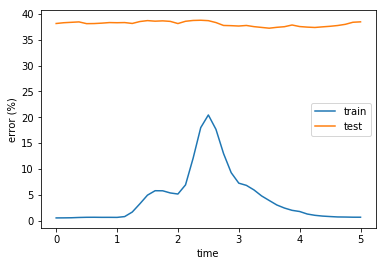

In [61]:
plt.plot(time, path_i['train'], label='train')
plt.plot(time, path_i['test'], label='test') 
plt.legend()
plt.xlabel('time')
plt.ylabel('error (%)')
plt.show()

In [ ]:
path_il = find_path(time, pf_inv, method='lin_connect')

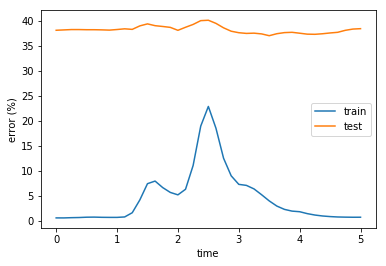

In [60]:
plt.plot(time, path_il['train'], label='train')
plt.plot(time, path_il['test'], label='test') 
plt.legend()
plt.xlabel('time')
plt.ylabel('error (%)')
plt.show()

In [65]:
stat_i = get_stat(PointFinderStepWiseInverse, model_name, architecture, t=2.5,
                  beg_ind=1, end_ind=7)

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.97s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:46, 106.47s/it]
2it [01:57, 77.75s/it] 
3it [02:00, 55.52s/it]
4it [02:04, 39.85s/it]
 17%|█▋        | 1/6 [02:35<12:59, 155.95s/it]

train results {'nll': 0.7013497108268738, 'loss': 0.7013497108268738, 'accuracy': 79.7}
test results {'nll': 2.225025433731079, 'loss': 2.225025433731079, 'accuracy': 61.08}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.97s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.79s/it]
2it [01:56, 77.28s/it] 
3it [02:00, 55.18s/it]
4it [02:03, 39.60s/it]
 33%|███▎      | 2/6 [05:11<10:23, 155.77s/it]

train results {'nll': 0.6931007558441162, 'loss': 0.6931007558441162, 'accuracy': 80.106}
test results {'nll': 2.268982872390747, 'loss': 2.268982872390747, 'accuracy': 60.78}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.96s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.96s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.81s/it]
2it [01:56, 77.29s/it] 
3it [02:00, 55.18s/it]
4it [02:03, 39.60s/it]
 50%|█████     | 3/6 [07:46<07:46, 155.61s/it]

train results {'nll': 0.7112699680709839, 'loss': 0.7112699680709839, 'accuracy': 79.552}
test results {'nll': 2.247043196105957, 'loss': 2.247043196105957, 'accuracy': 61.3}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.69s/it]
2it [01:56, 77.20s/it] 
3it [01:59, 55.11s/it]
4it [02:03, 39.55s/it]
 67%|██████▋   | 4/6 [10:21<05:10, 155.47s/it]

train results {'nll': 0.724193741607666, 'loss': 0.724193741607666, 'accuracy': 79.386}
test results {'nll': 2.2730863555908205, 'loss': 2.2730863555908205, 'accuracy': 61.14}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.96s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.85s/it]
2it [01:56, 77.30s/it] 
3it [02:00, 55.19s/it]
4it [02:03, 39.61s/it]
 83%|████████▎ | 5/6 [12:56<02:35, 155.35s/it]

train results {'nll': 0.703001616973877, 'loss': 0.703001616973877, 'accuracy': 79.906}
test results {'nll': 2.237695930480957, 'loss': 2.237695930480957, 'accuracy': 60.87}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.96s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.79s/it]
2it [01:56, 77.28s/it] 
3it [02:00, 55.17s/it]
4it [02:03, 39.59s/it]
100%|██████████| 6/6 [15:32<00:00, 155.33s/it]

train results {'nll': 0.7276641939926147, 'loss': 0.7276641939926147, 'accuracy': 79.606}
test results {'nll': 2.2839620193481447, 'loss': 2.2839620193481447, 'accuracy': 61.02}


In [69]:
get_mean_svd(stat_i)

(79.70933333333333,
 0.2366732393453518,
 61.031666666666666,
 0.17111562043120238)

In [66]:
stat_il = get_stat(PointFinderStepWiseInverse, model_name, architecture, t=2.5,
                  beg_ind=1, end_ind=7, method='lin_connect')

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.96s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:46, 106.42s/it]
2it [01:57, 77.71s/it] 
3it [02:00, 55.47s/it]
4it [02:03, 39.81s/it]
 17%|█▋        | 1/6 [02:35<12:56, 155.40s/it]

train results {'nll': 0.8137041589736939, 'loss': 0.8137041589736939, 'accuracy': 77.314}
test results {'nll': 2.282440445327759, 'loss': 2.282440445327759, 'accuracy': 59.66}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.90s/it]
2it [01:56, 77.35s/it] 
3it [02:00, 55.22s/it]
4it [02:03, 39.63s/it]
 33%|███▎      | 2/6 [05:10<10:21, 155.28s/it]

train results {'nll': 0.8136637378883362, 'loss': 0.8136637378883362, 'accuracy': 77.732}
test results {'nll': 2.3255672981262205, 'loss': 2.3255672981262205, 'accuracy': 59.54}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.97s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.78s/it]
2it [01:56, 77.28s/it] 
3it [02:00, 55.17s/it]
4it [02:03, 39.59s/it]
 50%|█████     | 3/6 [07:45<07:45, 155.21s/it]

train results {'nll': 0.8272357078552246, 'loss': 0.8272357078552246, 'accuracy': 77.128}
test results {'nll': 2.293575016403198, 'loss': 2.293575016403198, 'accuracy': 59.84}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.96s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.89s/it]
2it [01:56, 77.35s/it] 
3it [02:00, 55.22s/it]
4it [02:03, 39.63s/it]
 67%|██████▋   | 4/6 [10:20<05:10, 155.22s/it]

train results {'nll': 0.8410471458435058, 'loss': 0.8410471458435058, 'accuracy': 76.914}
test results {'nll': 2.341566145324707, 'loss': 2.341566145324707, 'accuracy': 59.9}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.96s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.94s/it]
2it [01:56, 77.39s/it] 
3it [02:00, 55.25s/it]
4it [02:03, 39.65s/it]
 83%|████████▎ | 5/6 [12:56<02:35, 155.25s/it]

train results {'nll': 0.8181925770568848, 'loss': 0.8181925770568848, 'accuracy': 77.39}
test results {'nll': 2.2784605003356933, 'loss': 2.2784605003356933, 'accuracy': 60.01}



  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

finding feature maps



100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

0it [00:00, ?it/s]

adjusting weights



1it [01:45, 105.84s/it]
2it [01:56, 77.32s/it] 
3it [02:00, 55.20s/it]
4it [02:03, 39.62s/it]
100%|██████████| 6/6 [15:31<00:00, 155.20s/it]

train results {'nll': 0.8503289281654358, 'loss': 0.8503289281654358, 'accuracy': 77.102}
test results {'nll': 2.3340929260253906, 'loss': 2.3340929260253906, 'accuracy': 59.75}


In [70]:
get_mean_svd(stat_il)

(77.26333333333332, 0.2596912696945259, 59.78333333333333, 0.15477582354991887)